## Ejercicio 3

Considere el siguiente modelo de un sistema de reacciones químicas:
\begin{align}
\frac{dx}{dt} &= a - (b+1) x + x^2 y, \\
\frac{dy}{dt} &= b\,x - x^2 y,
\end{align}
donde $x$ e $y$ son las concentraciones, y $a$ y $b$ son parámetros. Resuelva numéricamente el sistema con un método RK4, y grafique las trayectorias en el espacio de fases $(x,y)$. Considere los siguientes casos.
1. Para $a=b=1$, y usando pasos $h=0.1$, $0.2$, $0.5$ y $1.0$, muestre numéricamente que las soluciones numéricas convergen al equilibrio, incluso para los pasos grandes.
2. Para $a=1$, $b=3$, muestre (numéricamente) que el equilibrio es inestable y que las trayectorias tienden a un ciclo límite. Pruebe distintas condiciones iniciales (tanto dentro del ciclo y cerca del punto fijo, como fuera de él). Use pasos $h=0.1$ y mayores, con cuidado. Verifique que a partir de cierto valor de $h$ las soluciones numéricas divergen. Los sistemas no lineales son chúcaros.

In [2]:
#Importo librerías
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Llamo y_vec = (x,y) y dy_vec/dt = f(y_vec,t) = f(y_vec) en este caso
def f(y_vec, a, b):
    '''
    y_vec = (x,y)
    
    '''
    #Asigno variables
    x = y_vec[0]
    y = y_vec[1]

    #Calculo derivadas
    dxdt = a - (b+1)*x + x**2*y
    dydt = b*x - x**2*y

    return np.array([dxdt, dydt])

def RK4(f, h, y_vec, *args):
    '''
    Calcula y_vec^{n+1} para dados y_vec^{n} = y_vec y paso de tiempo h usando f = dy_vec/dt

    '''

    #Calculo los ks
    k1 = h*f(y_vec, *args)
    k2 = h*f(y_vec + k1/2, *args)
    k3 = h*f(y_vec + k2/2, *args)
    k4 = h*f(y_vec + k3, *args)

    return y_vec + k1/6 + (k2+k3)/3 + k4/6

def solver(y0_vec, N, h, *args):
    y_vec = np.empty([N,2])
    y_vec[0] = y0_vec

    for t in range(1,N):
        y_vec[t] = RK4(f, h, y_vec[t-1], *args)

    return y_vec



### 1. $a = b= 1$

In [4]:
#Condiciones iniciales
x0 = 0
y0 = 2
h_vec = np.array([0.1,0.2,0.5]) #Tamaño de paso de tiempo
T = 10 #Tiempo total
a = 1
b = 1

y0_vec = np.array([x0,y0])

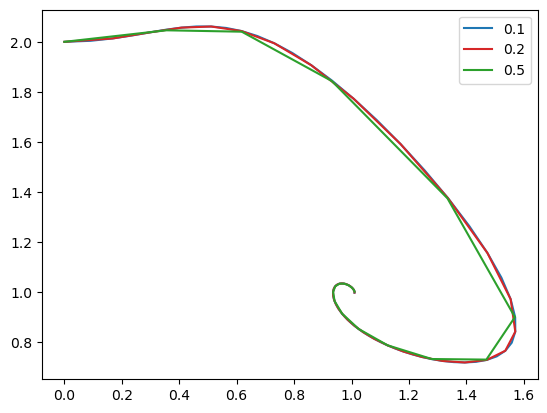

In [6]:
#Resuelvo
color_vec = ["tab:blue", "tab:red", "tab:green"]
for i in range(len(h_vec)):
    h = h_vec[i]
    y_vec = solver(y0_vec, int(T/h), h, a, b)


    #Grafico x, y vs t
    # t_vec = np.linspace(0, T, int(T/h))
    # plt.plot(t_vec, y_vec[:,0], "--", label = "x", color = color_vec[i])
    # plt.plot(t_vec, y_vec[:,1], label = "y", color = color_vec[i])
    # plt.legend()

    #Grafico y vs x
    plt.plot(y_vec[:,0], y_vec[:,1], color = color_vec[i], label = str(h))

plt.legend()


### 2. a = 1, b = 3

In [25]:
#Condiciones iniciales
x0 = 0
y0 = 2
h_vec = np.array([0.1, 0.2, 0.5, 0.51]) #Tamaño de paso de tiempo
T = 20 #Tiempo total
a = 1
b = 3

y0_vec = np.array([x0,y0])

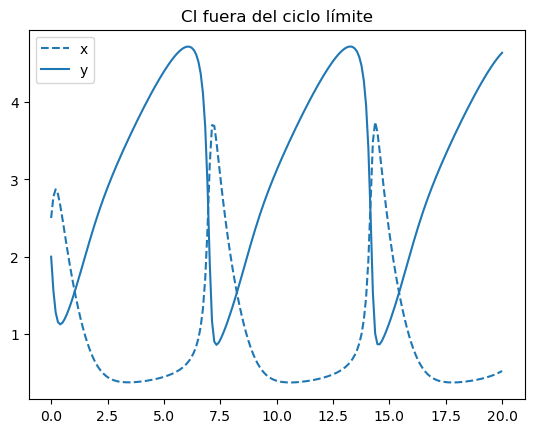

In [34]:
#Resuelvo
color_vec = ["tab:blue", "tab:red", "tab:green", "black"]

for i in range(len(h_vec)):
    h = h_vec[i]
    y_vec = solver(y0_vec, int(T/h), h, a, b)

    #Grafico x, y vs t
    t_vec = np.linspace(0, T, int(T/h))
    plt.plot(t_vec, y_vec[:,0], "--", label = "x", color = color_vec[i])
    plt.plot(t_vec, y_vec[:,1], label = "y", color = color_vec[i])
    
    #Grafico y vs x
    # plt.plot(y_vec[:,0], y_vec[:,1], color = color_vec[i], label = str(h), alpha = 0.6)

plt.legend()
plt.title("CI fuera del ciclo límite");



In [31]:
#Condiciones iniciales
x0 = 2.5
y0 = 2
h_vec = np.array([0.1, 0.2, 0.5, 0.51]) #Tamaño de paso de tiempo
T = 20 #Tiempo total
a = 1
b = 3

y0_vec = np.array([x0,y0])

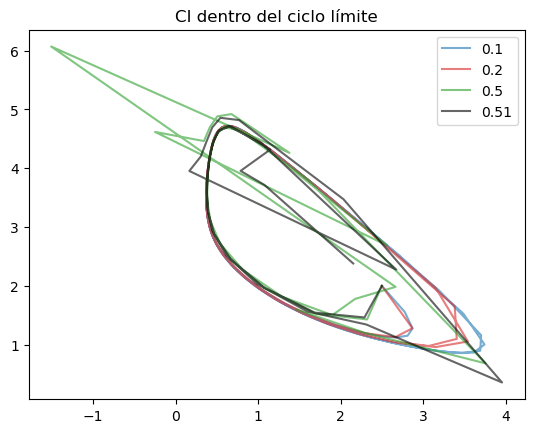

In [32]:
#Resuelvo
color_vec = ["tab:blue", "tab:red", "tab:green", "black"]

for i in range(len(h_vec)):
    h = h_vec[i]
    y_vec = solver(y0_vec, int(T/h), h, a, b)

    #Grafico x, y vs t
    # t_vec = np.linspace(0, T, int(T/h))
    # plt.plot(t_vec, y_vec[:,0], "--", label = "x", color = color_vec[i])
    # plt.plot(t_vec, y_vec[:,1], label = "y", color = color_vec[i])
    
    #Grafico y vs x
    plt.plot(y_vec[:,0], y_vec[:,1], color = color_vec[i], label = str(h), alpha = 0.6)

plt.legend()
plt.title("CI dentro del ciclo límite");

